In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 

# metadata 
print(individual_household_electric_power_consumption.metadata) 

# variable information 
print(individual_household_electric_power_consumption.variables)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [3]:
X.shape

(2075259, 9)

In [4]:
X.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [5]:
# number of distinct values
X.nunique()

Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64

In [6]:
# no. of nan values in teh dataset
X.isnull().sum()    

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
# removing nan values
X.dropna(inplace=True)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 156.3+ MB


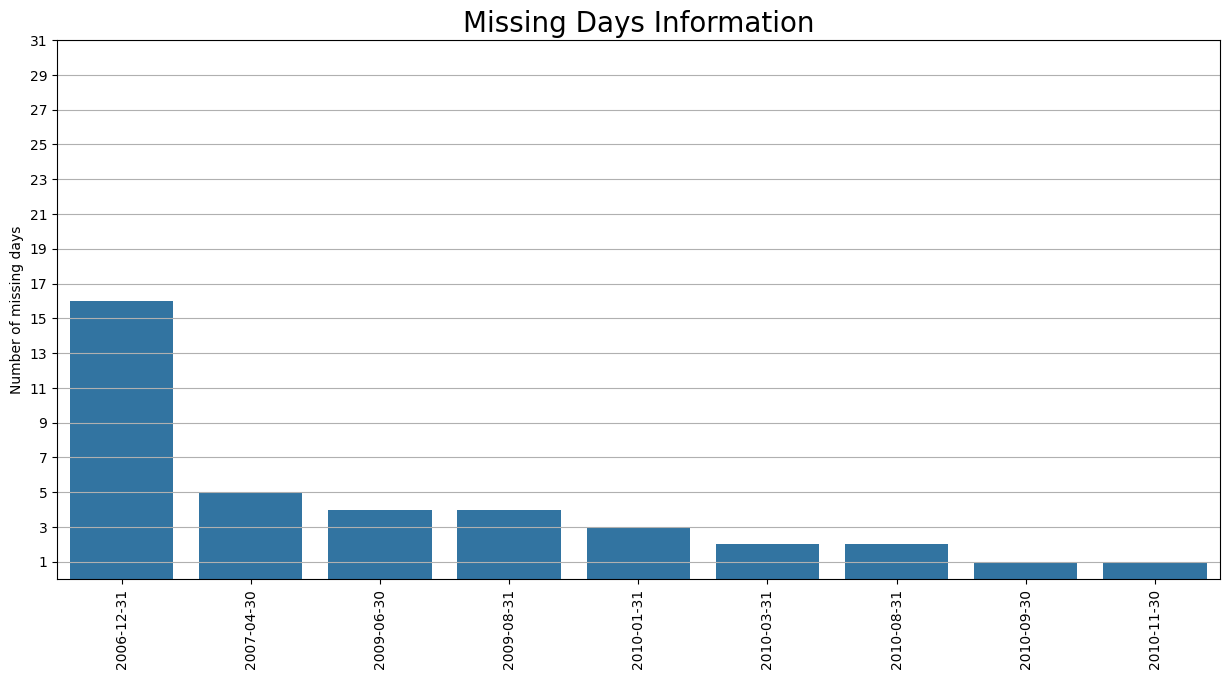

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_days = pd.DataFrame()
data_days['Datetime'] = pd.to_datetime(X['Date'] + ' ' + X['Time'], format='%d/%m/%Y %H:%M:%S')
data_days['Global_active_power'] = X['Global_active_power']
data_days.set_index('Datetime', inplace=True)

missing_days_df = np.round(data_days[['Global_active_power']].resample('m').count()/1440).astype(int)
missing_days_df.columns = ['Number of missing days']
missing_days_df['Number of missing days'] = missing_days_df.index.astype(str).str[-2:].astype(int) - missing_days_df['Number of missing days']
# Drop the rows where the number of missing days is 0
missing_days_df.drop(missing_days_df[missing_days_df['Number of missing days']==0].index,inplace=True)

plt.figure(figsize=(15,7))
sns.barplot(
    data = missing_days_df,
    x = missing_days_df.index.date,
    y = missing_days_df.sort_values(by=['Number of missing days'],ascending=False)['Number of missing days']
)
plt.xticks(rotation = 90)
plt.yticks(np.arange(1,32,2))
plt.xlabel('')
plt.grid(axis='y')
plt.title('Missing Days Information',fontsize=20)
plt.show()

In [9]:
import pandas as pd

X[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']]=X[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']].apply(pd.to_numeric) 
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [10]:
X["date"] =pd.to_datetime(X["Date"],format="%d/%m/%Y").dt.day
X["month"] =pd.to_datetime(X["Date"],format="%d/%m/%Y").dt.month
X["year"] =pd.to_datetime(X["Date"],format="%d/%m/%Y").dt.year
X["hour"] = pd.to_datetime(X["Time"]).dt.hour 
X["minute"] = pd.to_datetime(X["Time"]).dt.minute

/tmp/ipykernel_73378/1729005596.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X["hour"] = pd.to_datetime(X["Time"]).dt.hour


/tmp/ipykernel_73378/1729005596.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X["minute"] = pd.to_datetime(X["Time"]).dt.minute


In [11]:
X.drop(columns=["Date","Time"],inplace=True)

In [12]:
X.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  date  month  year  hour  \
0             0.0             1.0            17.0    16     12  2006    17   
1             0.0             1.0            16.0    16     12  2006    17   
2             0.0             2.0            17.0    16     12  2006    17   
3             0.0             1.0            17.0    16     12  2006    17   
4             0.0             1.0            17.0    16     12  2006    17   

   minute  
0      24  
1      25  
2      26  
3      27  
4      28

In [13]:
X.shape

(2049280, 12)

<Axes: >

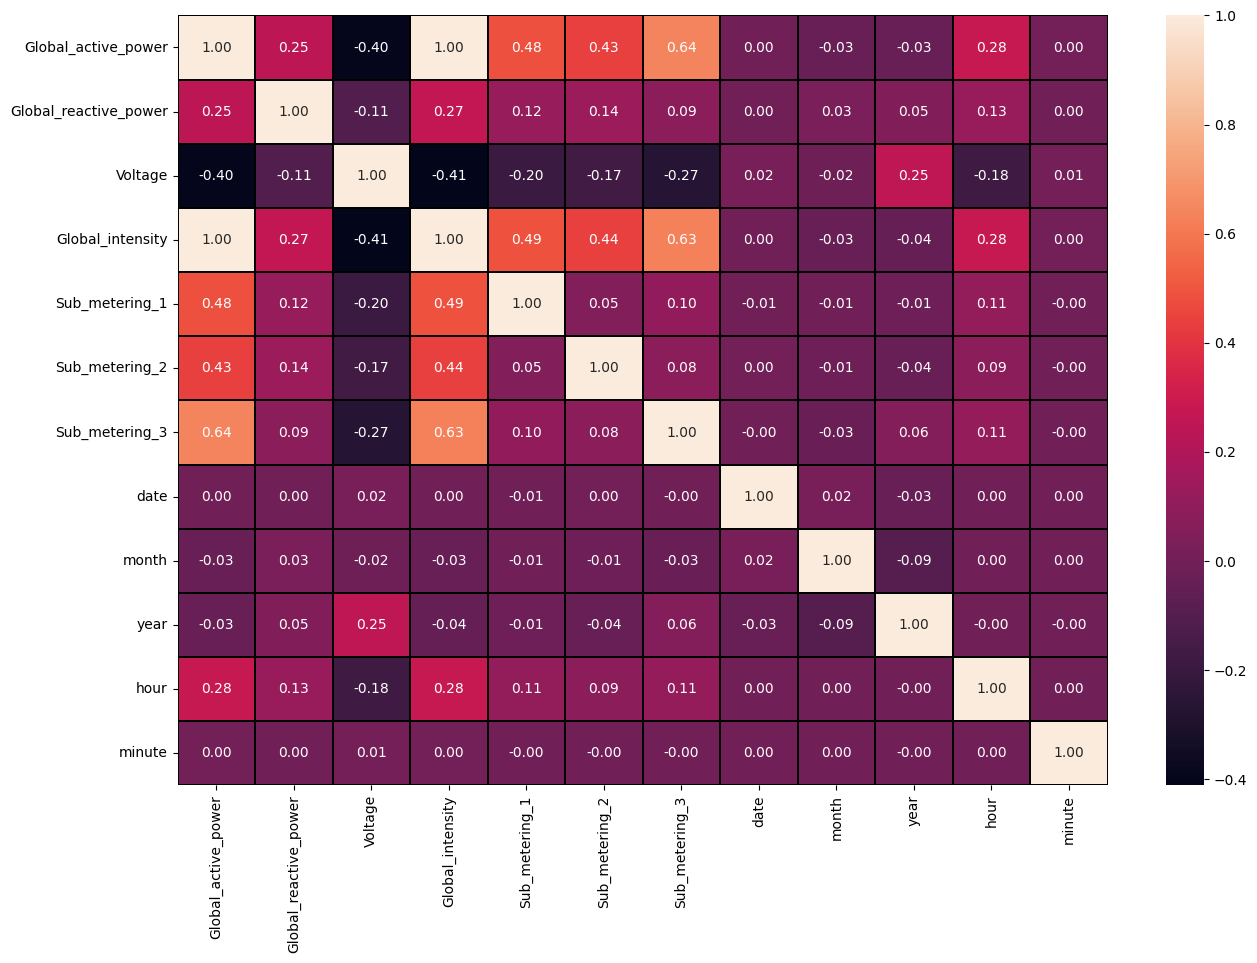

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

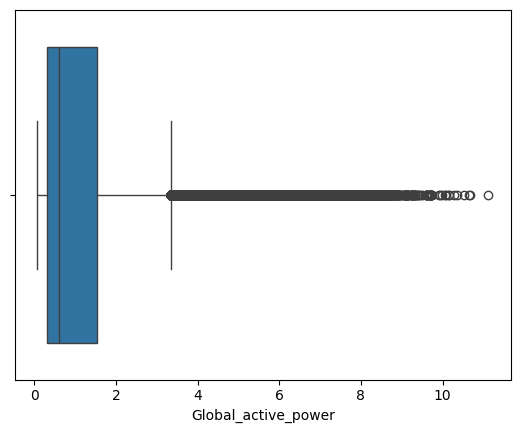

In [16]:
# checking for outliers based on Global_active_power
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=X['Global_active_power'])
plt.show()

In [17]:
# # checking for outliers based on Global_active_power.
# # calculating the IQR (Interquartile Range), Q1 and Q3
# Q1 = X['Global_active_power'].quantile(0.25)
# Q3 = X['Global_active_power'].quantile(0.75)
# IQR = Q3 - Q1
# # filtering values based on IQR
# outliers = X[(X['Global_active_power'] < (Q1 - 2 * IQR)) | (X['Global_active_power'] > (Q3 + 2 * IQR))]
# outliers

In [18]:
# # checking for outliers based on Global_active_power.
# # calculating the IQR (Interquartile Range), Q1 and Q3
# Q1 = X['Global_reactive_power'].quantile(0.25)
# Q3 = X['Global_reactive_power'].quantile(0.75)
# IQR = Q3 - Q1
# # filtering values based on IQR
# outliers = X[(X['Global_reactive_power'] < (Q1 - 3 * IQR)) | (X['Global_reactive_power'] > (Q3 + 3 * IQR))]
# outliers

In [19]:
# len(outliers)/X.shape[0]

In [20]:
#checking for outliters using zscore method
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(X))
print(X.shape)
print(z.shape)
threshold=3
outliers=np.where(z>=3)
len(np.unique(outliers[0]))
# print(outliers)

(2049280, 12)
(2049280, 12)


136205

In [18]:
df_new=X[(z<=3).all(axis=1)]
outliers = X[~((z < 3).all(axis=1))]
print(df_new.shape)

(1913075, 12)


In [22]:
df_new.to_csv('data_processed_1.csv',index=False)

<Axes: >

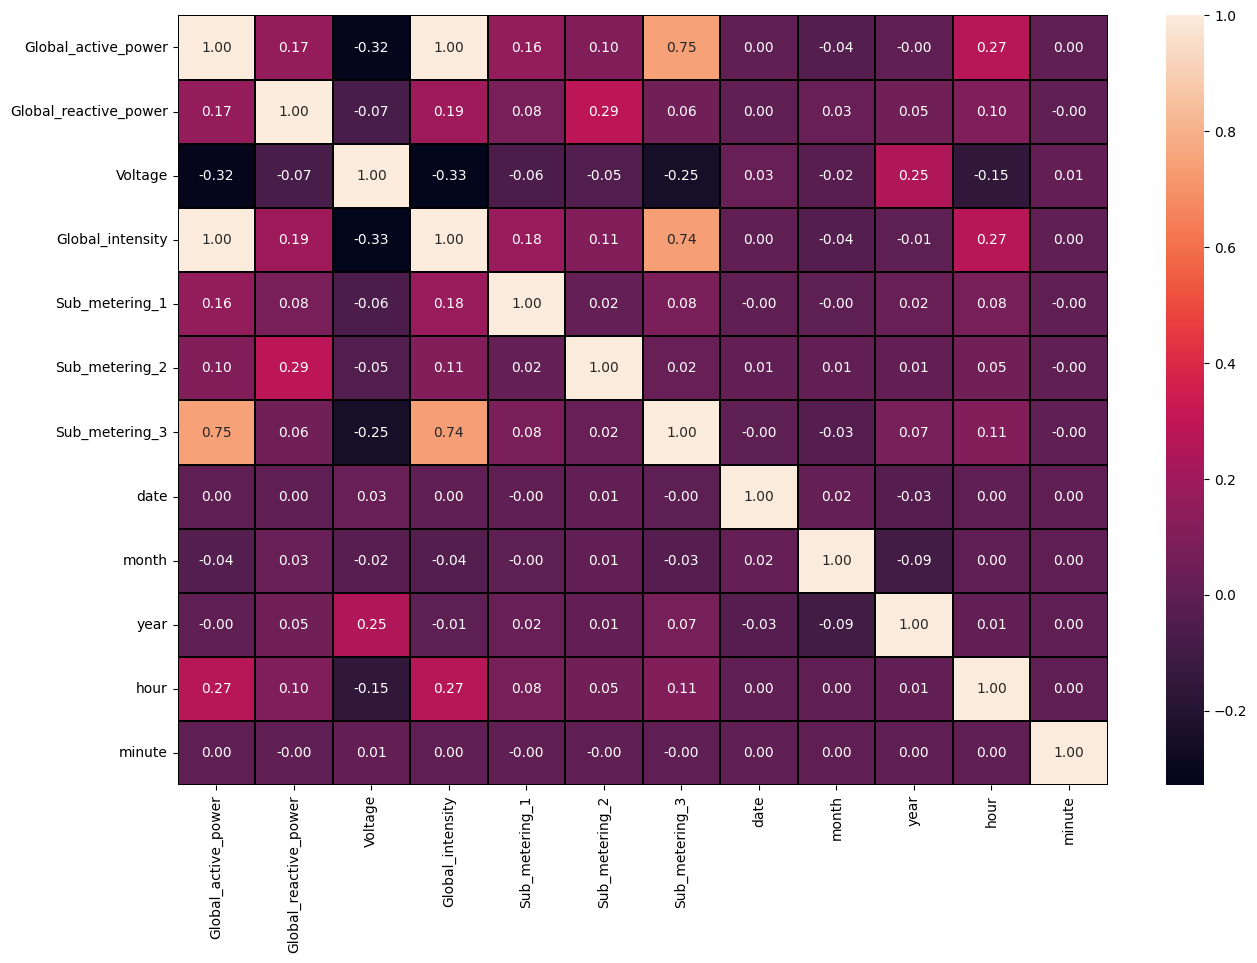

In [23]:
#heatmap after preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

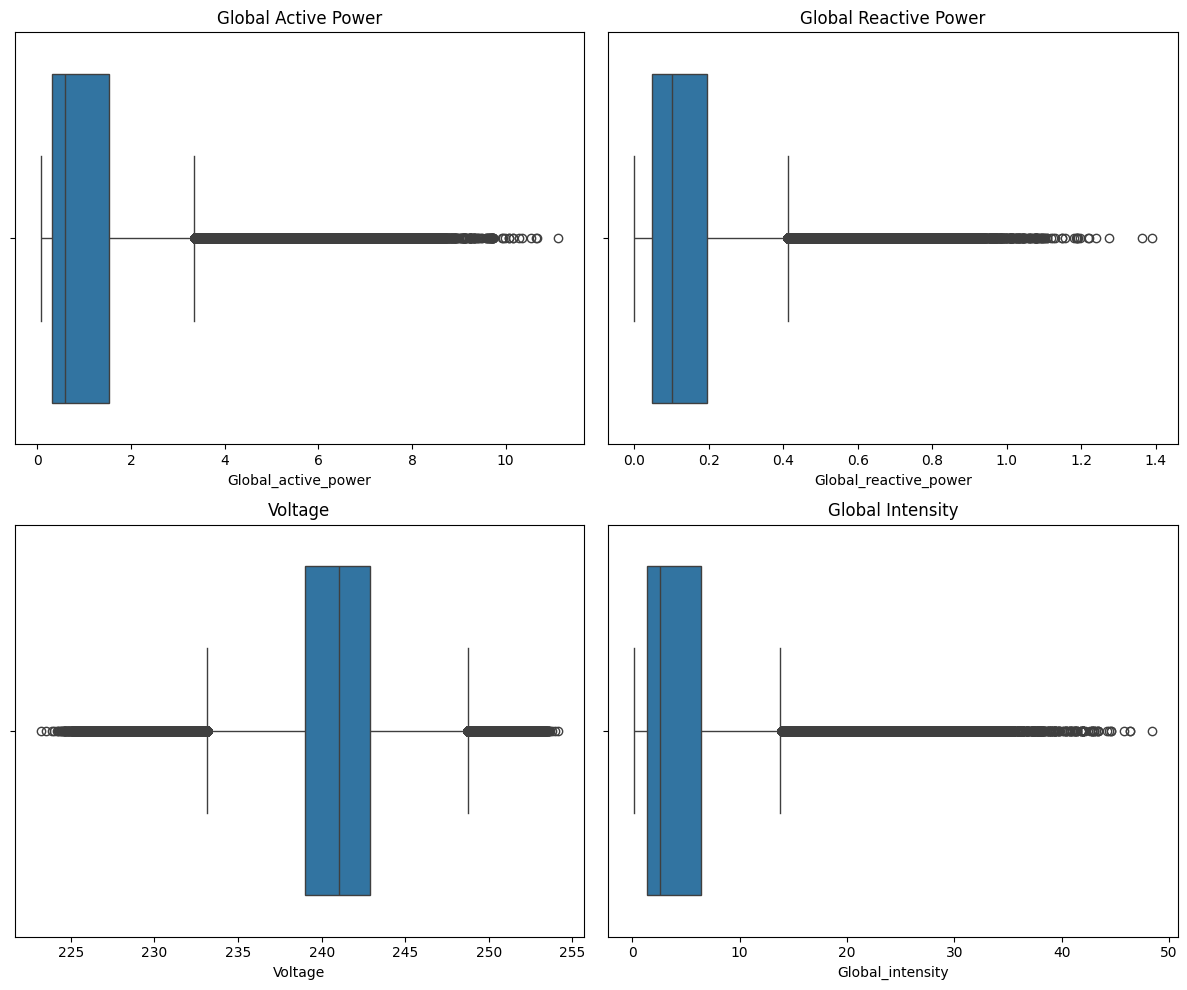

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=X['Global_active_power'])
plt.title('Global Active Power')

plt.subplot(2, 2, 2)
sns.boxplot(x=X['Global_reactive_power'])
plt.title('Global Reactive Power')

plt.subplot(2, 2, 3)
sns.boxplot(x=X['Voltage'])
plt.title('Voltage')

plt.subplot(2, 2, 4)
sns.boxplot(x=X['Global_intensity'])
plt.title('Global Intensity')

plt.tight_layout()
plt.show()


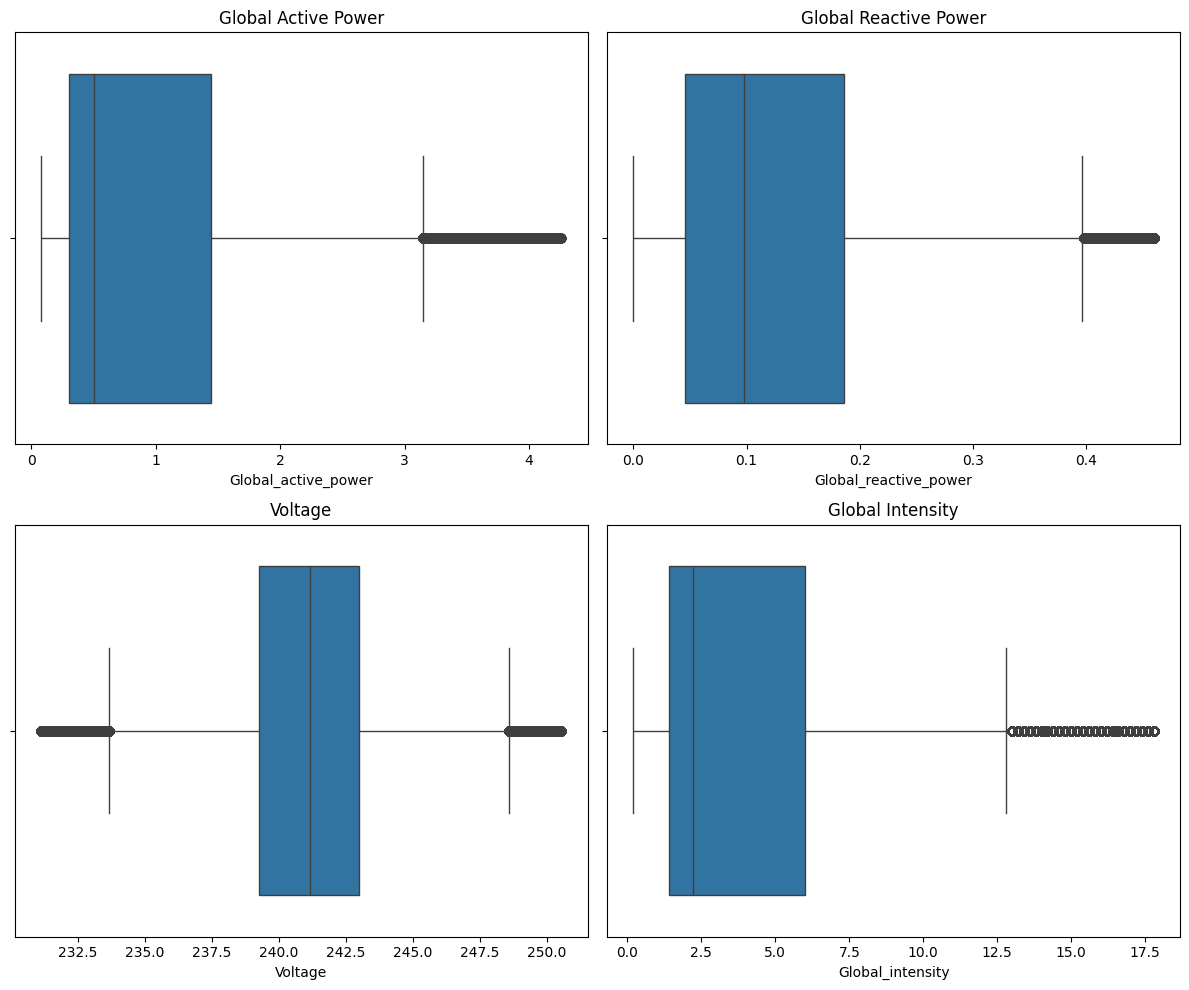

In [34]:
#after processing
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df_new['Global_active_power'])
plt.title('Global Active Power')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_new['Global_reactive_power'])
plt.title('Global Reactive Power')

plt.subplot(2, 2, 3)
sns.boxplot(x=df_new['Voltage'])
plt.title('Voltage')

plt.subplot(2, 2, 4)
sns.boxplot(x=df_new['Global_intensity'])
plt.title('Global Intensity')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis

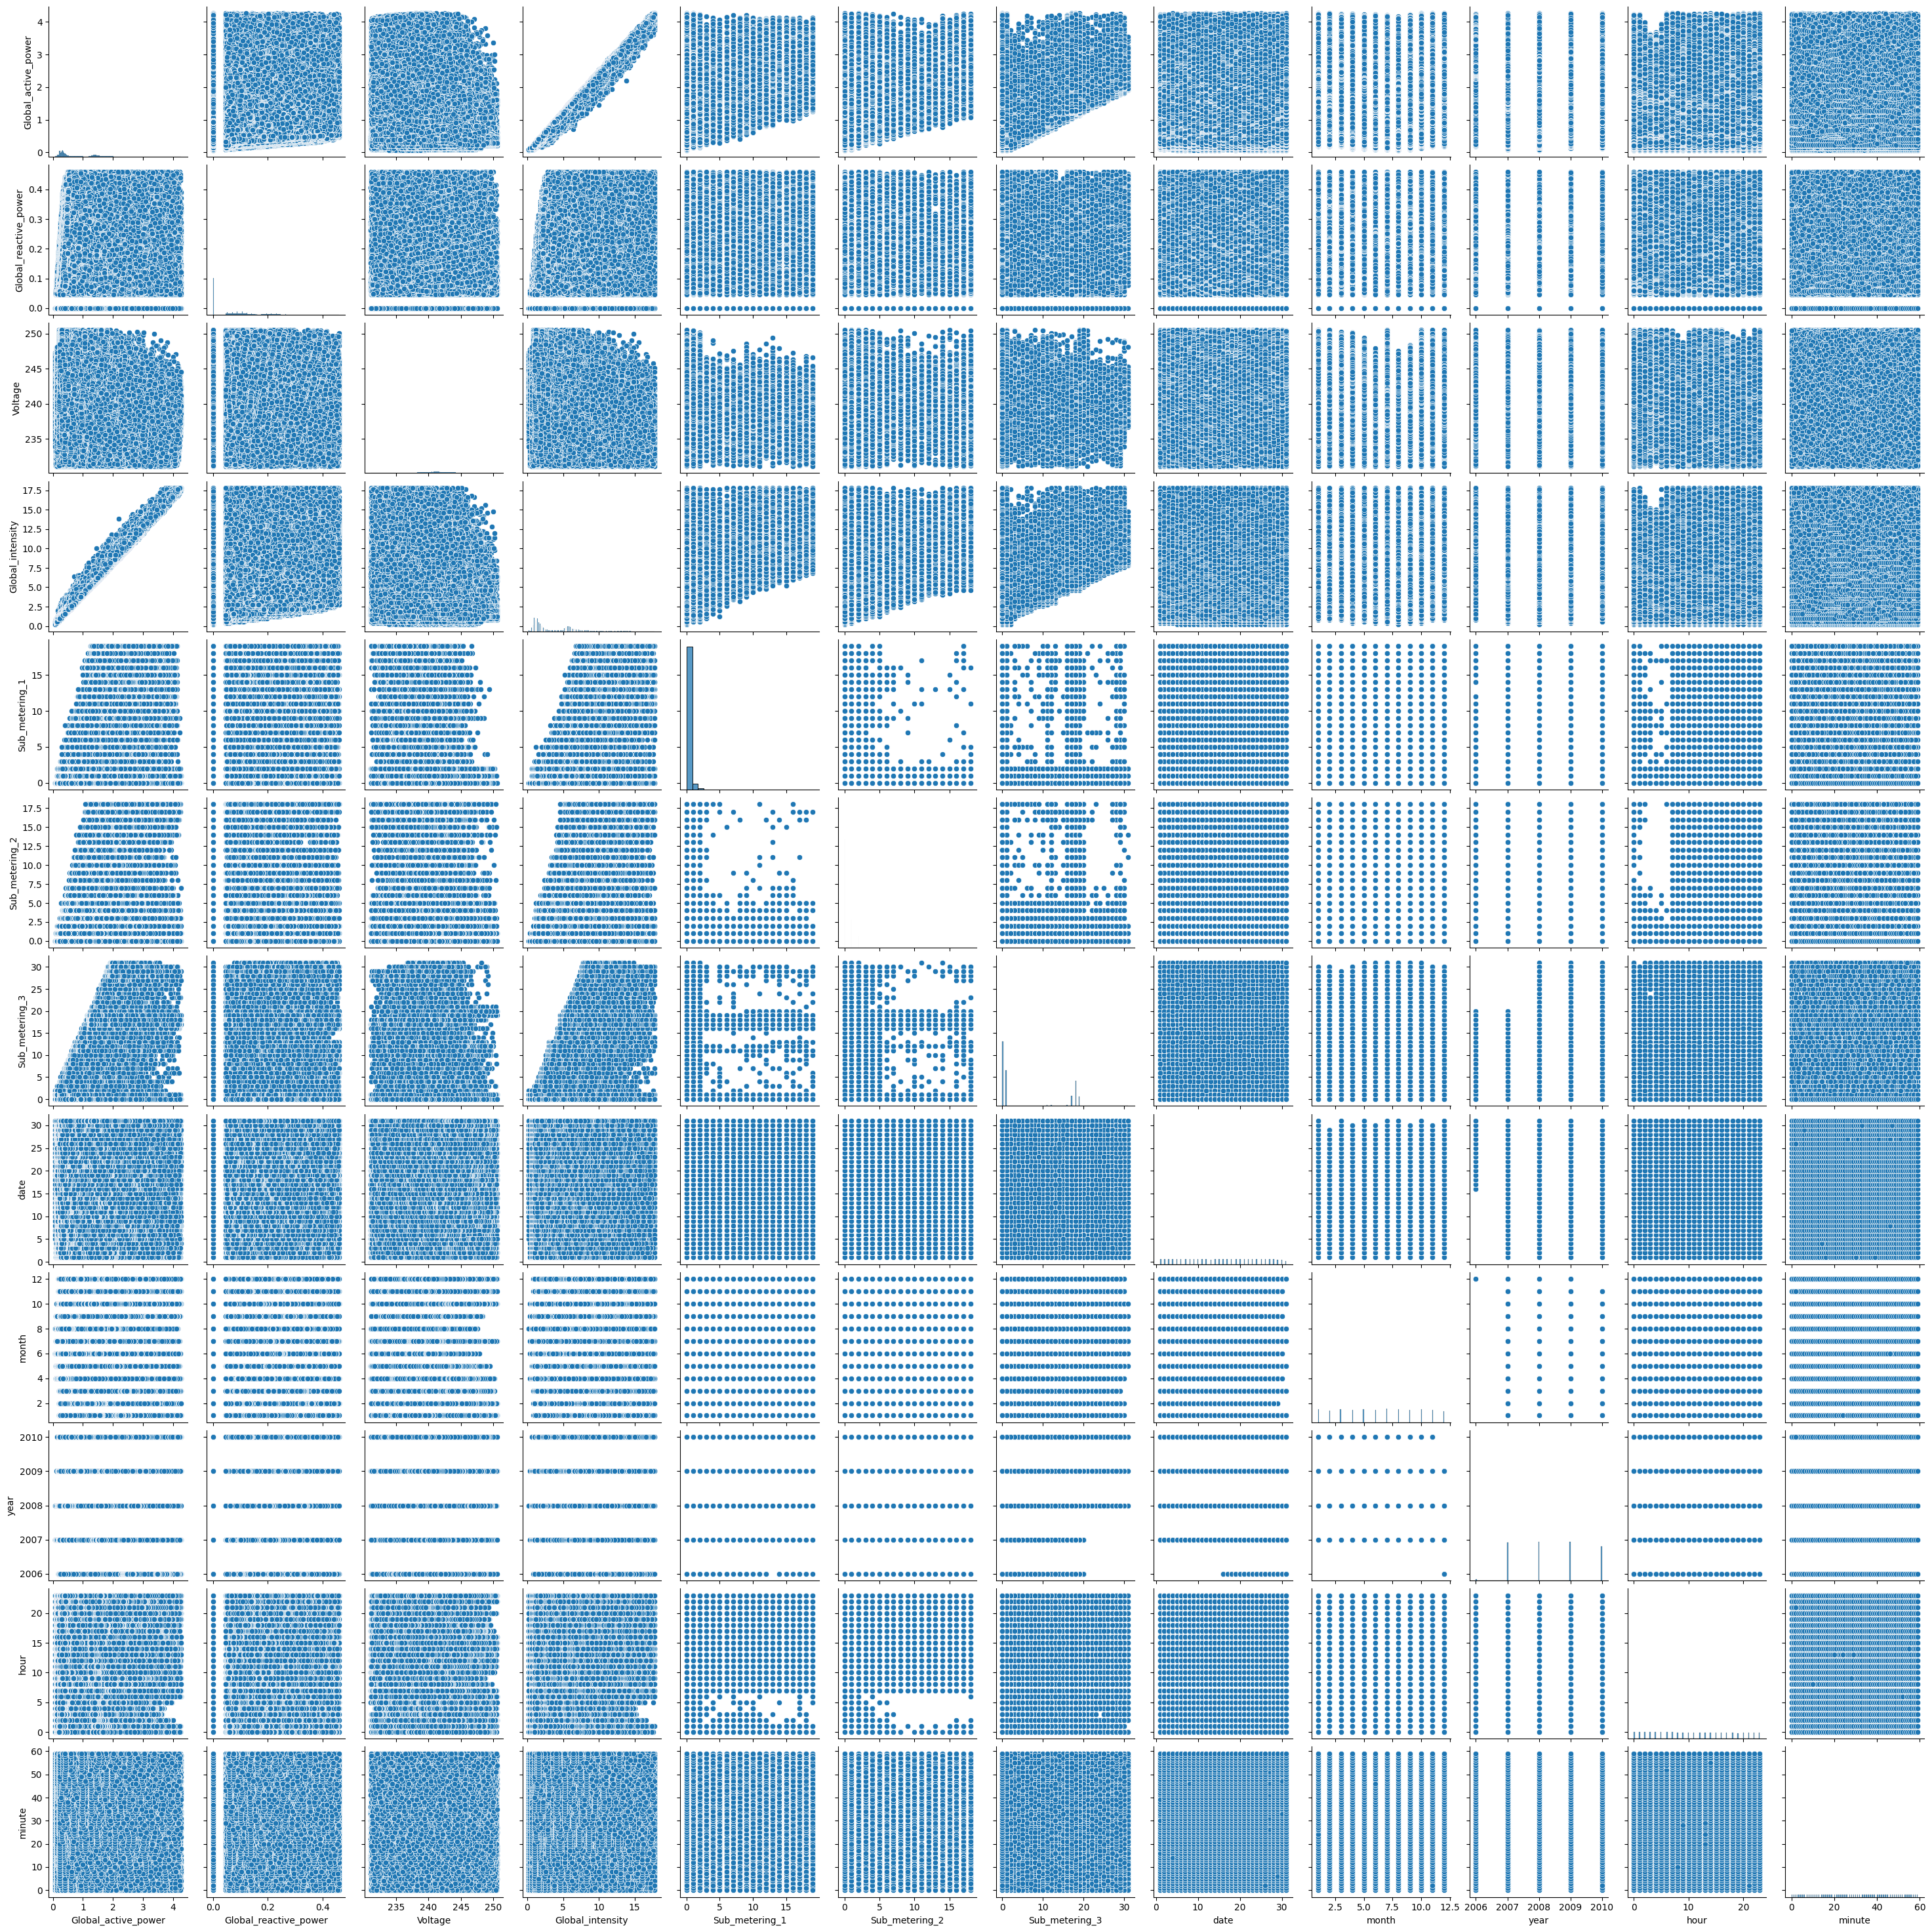

In [35]:
# Pairplot
sns.pairplot(df_new)
plt.show()

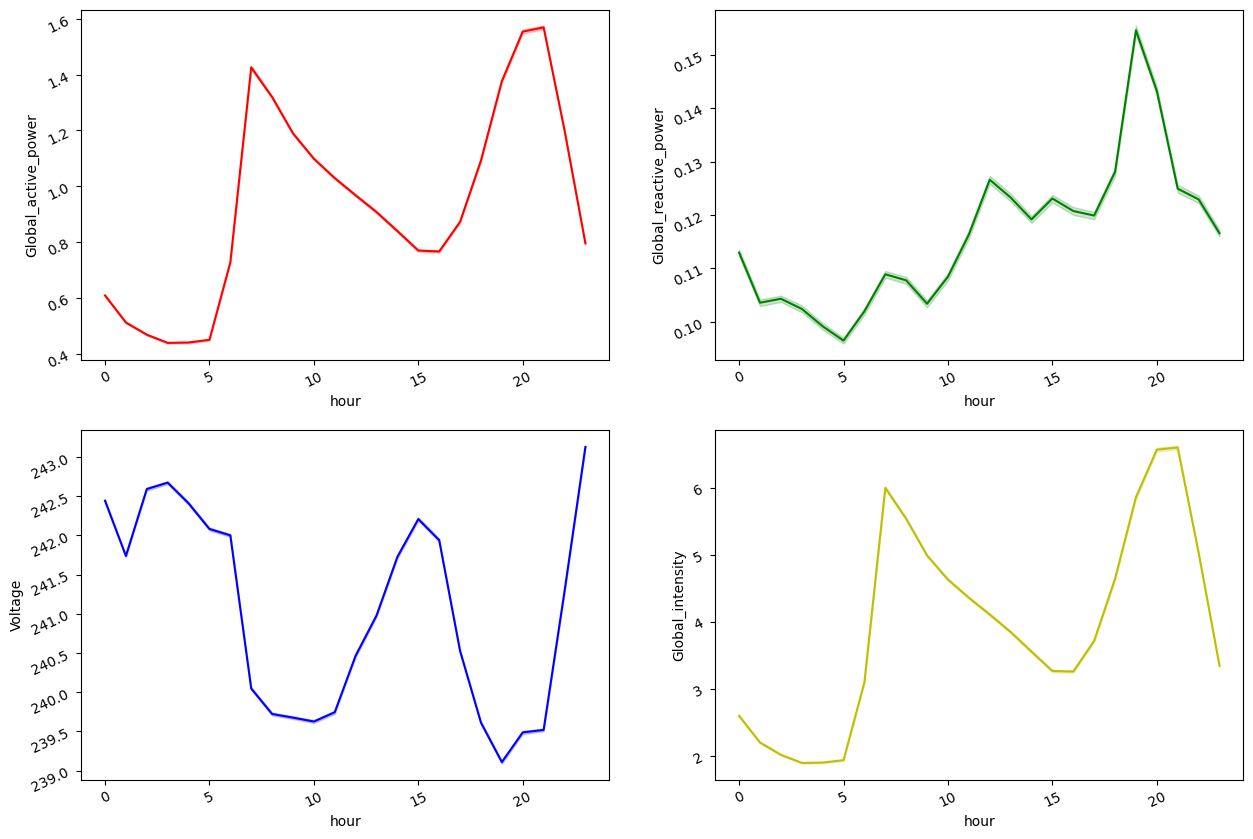

In [30]:
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 15, 10))

sns.lineplot(x=df_new['hour'], y=df_new['Global_active_power'], ax = ax[0][0], color='r')
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot(x=df_new['hour'], y=df_new['Global_reactive_power'], ax = ax[0][1], color='g')
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot(x=df_new['hour'], y=df_new['Voltage'], ax = ax[1][0], color='b')
ax[1][0].tick_params(labelrotation = 25)

sns.lineplot(x=df_new['hour'], y=df_new['Global_intensity'], ax = ax[1][1], color='y')
ax[1][1].tick_params(labelrotation = 25)
plt.show()

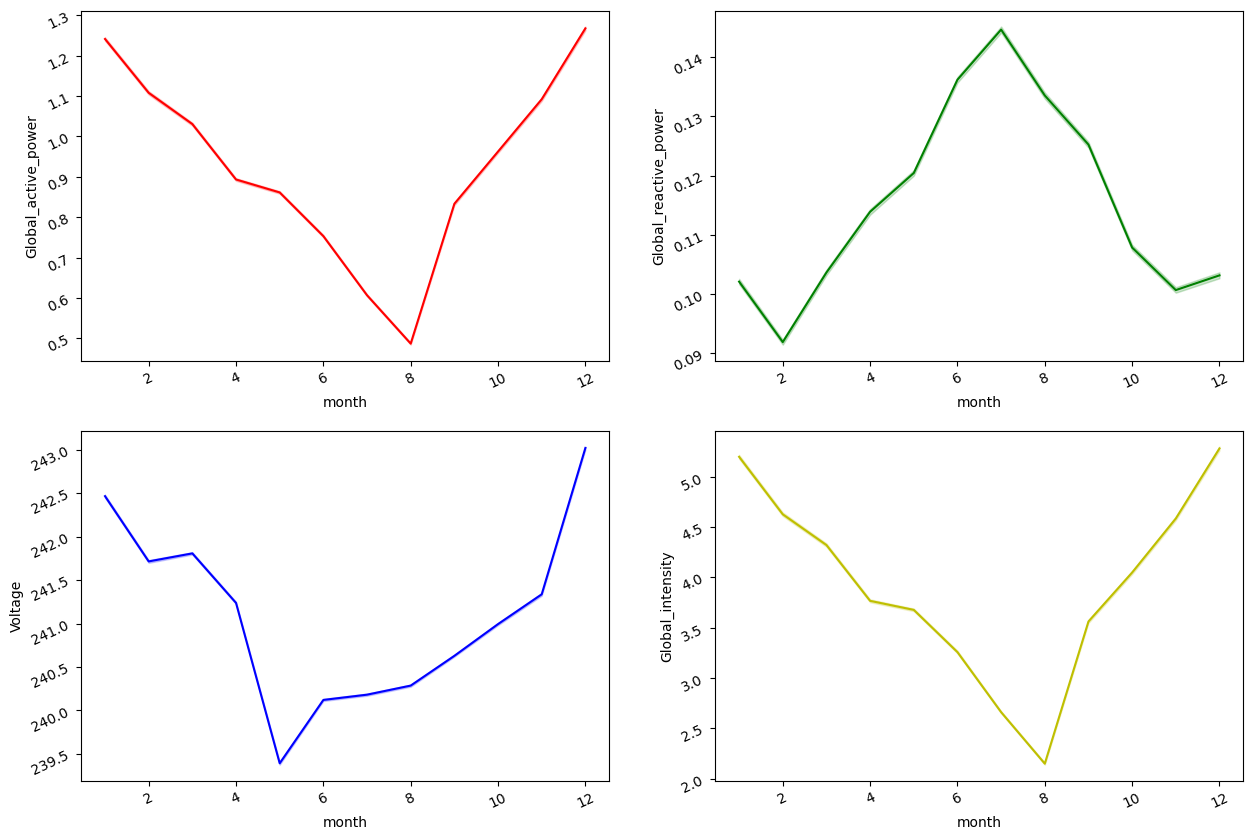

In [31]:
# Visualization across months
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 15, 10))

sns.lineplot(x=df_new['month'], y=df_new['Global_active_power'], ax = ax[0][0], color='r')
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot(x=df_new['month'], y=df_new['Global_reactive_power'], ax = ax[0][1], color='g')
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot(x=df_new['month'], y=df_new['Voltage'], ax = ax[1][0], color='b')
ax[1][0].tick_params(labelrotation = 25)

sns.lineplot(x=df_new['month'], y=df_new['Global_intensity'], ax = ax[1][1], color='y')
ax[1][1].tick_params(labelrotation = 25)
plt.show()

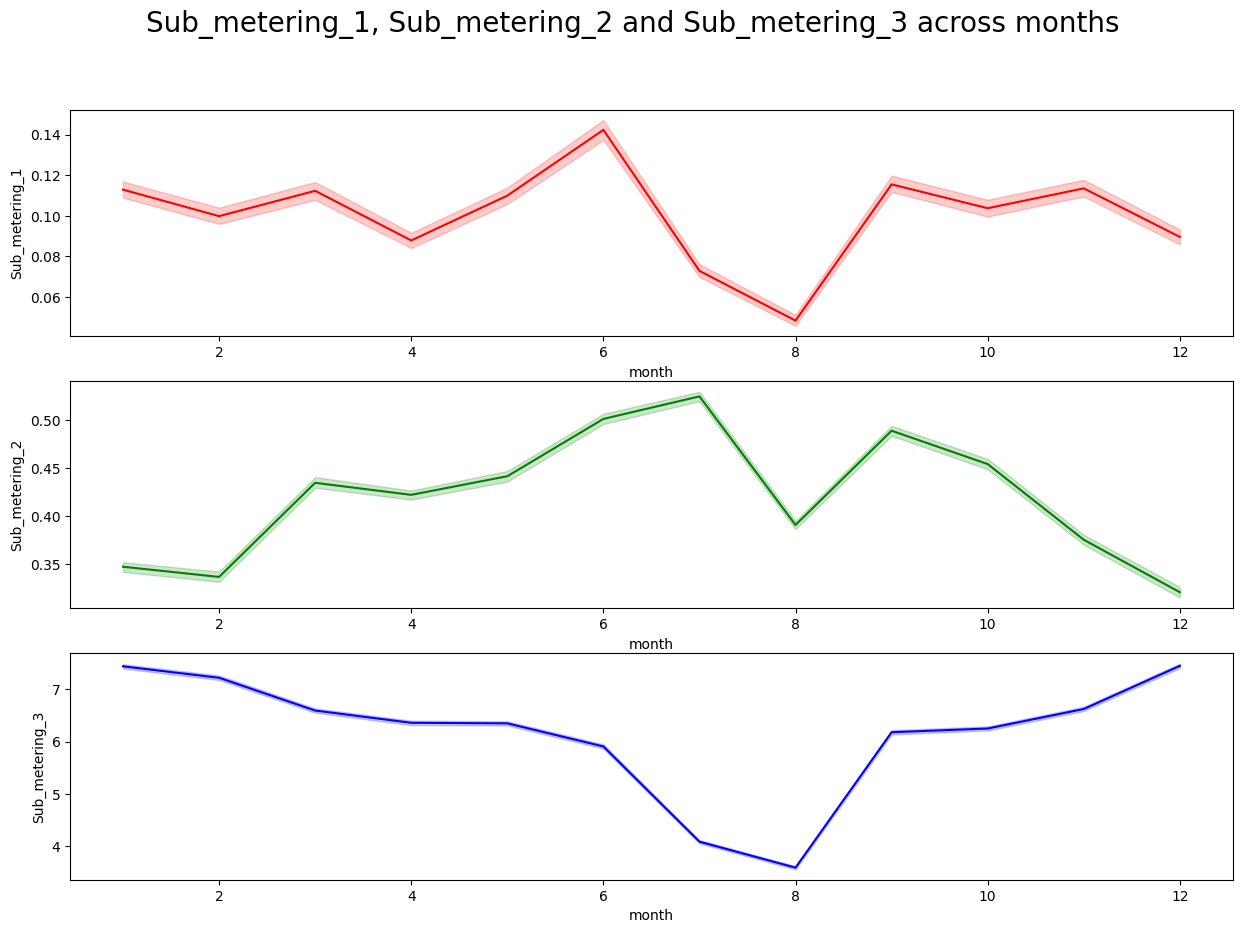

In [34]:
# Plots across Months vs Sub_metering_1, Sub_metering_2 and Sub_metering_3
fig,ax =  plt.subplots( 3,1,
                       figsize = (15, 10))

sns.lineplot( x = 'month', y = "Sub_metering_1", 
             color = 'r', data = df_new, 
             ax = ax[0] )

sns.lineplot( x = 'month', y = "Sub_metering_2", 
             color = 'g', data = df_new,
             ax = ax[1])

sns.lineplot(x = 'month', y = "Sub_metering_3", 
             color = 'b', data = df_new,
             ax = ax[2])

# Setting the title for the figure
plt.suptitle("Sub_metering_1, Sub_metering_2 and Sub_metering_3 across months", fontsize = 20)

plt.show()

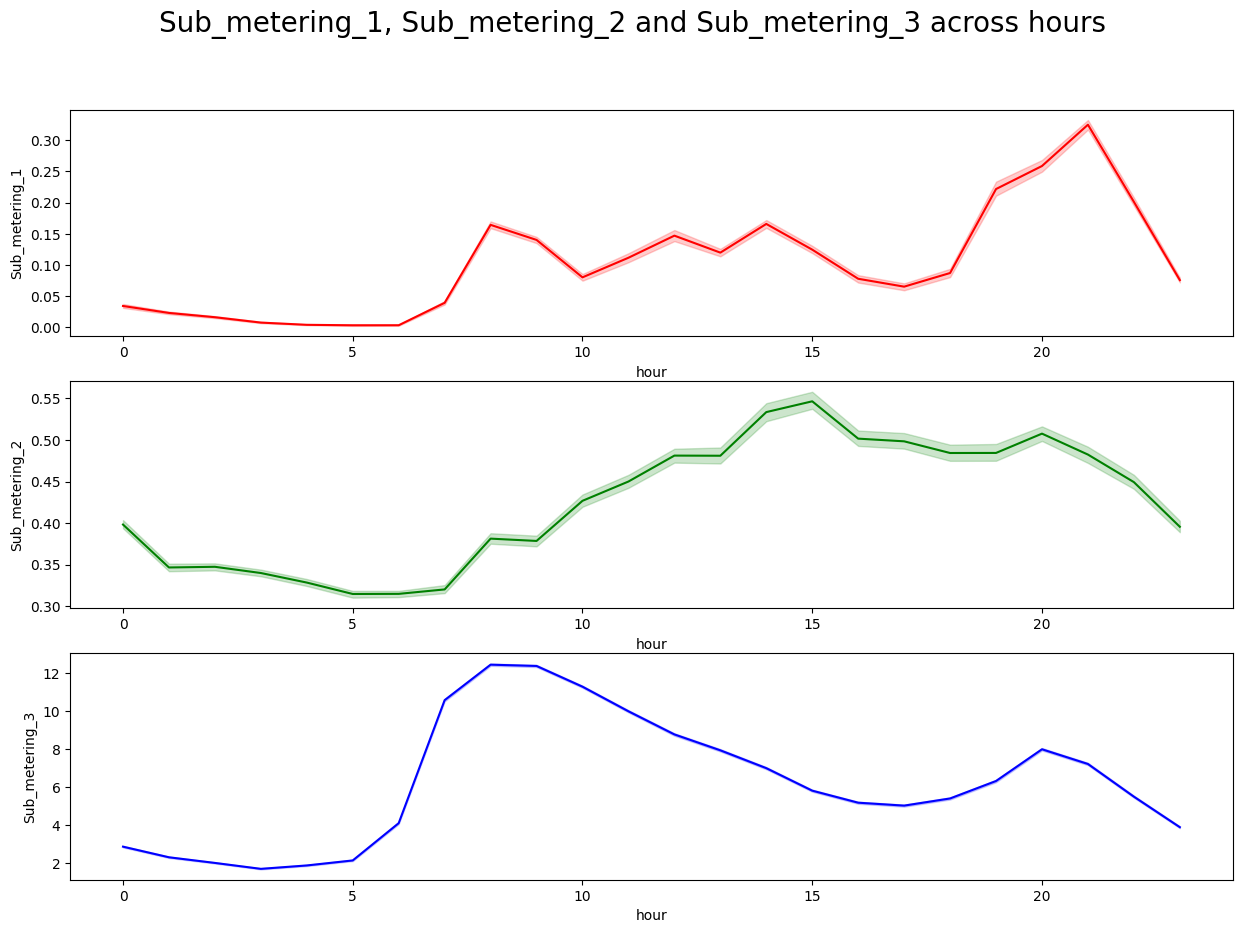

In [35]:
# Plots across hours vs Sub_metering_1, Sub_metering_2 and Sub_metering_3
fig,ax =  plt.subplots( 3,1,
                       figsize = (15, 10))

sns.lineplot( x = 'hour', y = "Sub_metering_1", 
             color = 'r', data = df_new, 
             ax = ax[0] )

sns.lineplot( x = 'hour', y = "Sub_metering_2", 
             color = 'g', data = df_new,
             ax = ax[1])

sns.lineplot(x = 'hour', y = "Sub_metering_3", 
             color = 'b', data = df_new,
             ax = ax[2])

# setting the title for the figure
plt.suptitle("Sub_metering_1, Sub_metering_2 and Sub_metering_3 across hours", fontsize = 20)

plt.show()